In [1]:
import numpy as np

In [2]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.discriminants = None
        
        
    def fit(self, X, y):
        n_features = X.shape[1]
        classes_labels = np.unique(y)
        
        overall_mean = np.mean(X, axis=0)
        Sw = np.zeros((n_features, n_features))
        Sb = np.zeros((n_features, n_features))
        
        for c_i in range(len(classes_labels)):
            X_ci = X[y == c_i]
            X_ci_mean = np.mean(X_ci, axis=0)
            
            Sw += (X_ci - X_ci_mean).T.dot(X_ci - X_ci_mean)
            
            Ni = X_ci.shape[0]
            means_difference = (X_ci_mean - overall_mean).reshape(-1, 1)
            Sb += Ni * means_difference.dot(means_difference.T)
            
        A = np.linalg.inv(Sw).dot(Sb)
        eig_values, eig_vectors = np.linalg.eig(A)
        eig_vectors = eig_vectors.T
        
        eig_values_ordered_indices = np.argsort(abs(eig_values))[::-1]
        eig_values = eig_values[eig_values_ordered_indices]
        eig_vectors = eig_vectors[eig_values_ordered_indices]
        
        self.discriminants = eig_vectors[0: self.n_components]

        
    def transform(self,X):
        return np.dot(X, self.discriminants.T)

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

In [5]:
lda = LDA(2)

In [6]:
lda.fit(X, y)

In [7]:
X_transformed = lda.transform(X)

In [8]:
x1 = X_transformed[ : , 0]
x2 = X_transformed[ :, 1]

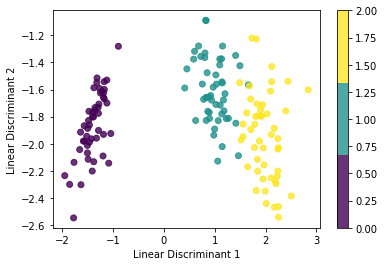

In [9]:
plt.scatter(x1, x2, c=y, alpha=.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()